([<matplotlib.patches.Wedge at 0x7f2ecb50cca0>,
 [Text(-0.2558079059349529, 1.172417295701993, 'English'),
  Text(-1.037388060409098, -0.7834704921824752, 'Russian'),
  Text(-0.6117180844621228, -1.1470836870699501, 'Korean'),
  Text(-0.07502357376075308, -1.2978333727332507, 'Portuguese'),
  Text(0.45450609035443656, -1.2179590361874757, 'Spanish'),
  Text(0.8874691585916563, -0.9499465735232786, 'French'),
  Text(1.1566054115169244, -0.5935182575538568, 'German'),
  Text(1.2614353231977802, -0.3142943292344168, 'Chinese'),
  Text(1.2912652925781587, -0.15044581809755583, 'Turkish'),
  Text(1.2992679500684057, -0.04362102618054116, 'Polish')],
 [Text(-0.14922127846205582, 0.6839100891594959, '56.84%'),
  Text(-0.6383926525594449, -0.4821356874969078, '6.91%'),
  Text(-0.3764418981305371, -0.7058976535815078, '6.90%'),
  Text(-0.04616835308354036, -0.7986666909127695, '6.85%'),
  Text(0.2796960556027302, -0.7495132530384465, '6.35%'),
  Text(0.5461348668256346, -0.5845825067835559, '6.

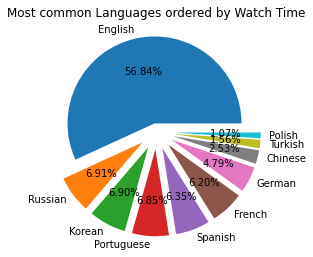

In [103]:
import psycopg2
import pandas
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt

conn = psycopg2.connect("postgresql://postgres:postgres@db")  
cursor = conn.cursor()
datos = sqlio.read_sql_query('SELECT SUM(watchtime) AS watch_time, language FROM twitch GROUP BY language ORDER BY watch_time DESC LIMIT 10',conn)
fig1,ax1 = plt.subplots()
explode = [0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
ax1.set_title('Most common Languages ordered by Watch Time')
ax1.pie(datos.watch_time,labels=datos.language,explode=explode,autopct='%1.2f%%')

<AxesSubplot:xlabel='Channel_Name', ylabel='Average_Viewers'>

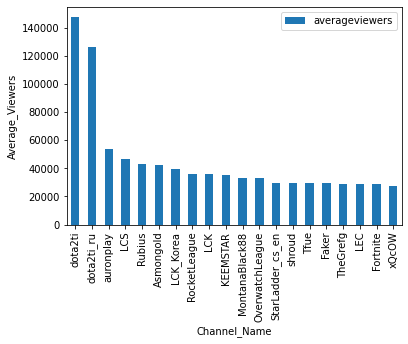

In [104]:
datos = sqlio.read_sql_query('SELECT channel,averageviewers FROM twitch ORDER BY averageviewers DESC LIMIT 20',conn)
datos.plot(kind='bar',x='channel',y='averageviewers',xlabel='Channel_Name',ylabel='Average_Viewers')

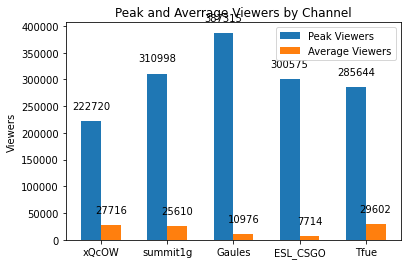

In [105]:
import numpy as np

datos = sqlio.read_sql_query('SELECT peakviewers as peak,averageviewers as avg,channel FROM twitch LIMIT 5',conn)
x = np.arange(len(datos.channel))
width = 0.30

fig1,ax1=plt.subplots()

rects1 = ax1.bar(x - width/2, datos.peak, width, label='Peak Viewers')
rects2 = ax1.bar(x + width/2, datos.avg, width, label='Average Viewers')

ax1.set_ylabel('Viewers')
ax1.set_title('Peak vs Averrage Viewers by Channel')
ax1.set_xticks(x)
ax1.set_xticklabels(datos.channel)
ax1.legend()

ax1.bar_label(rects1, padding=10)
ax1.bar_label(rects2, padding=10)

plt.show()
conn.close();